# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #define output unit
    units = 'metric'
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_request = requests.get(city_url)
        city_weather = weather_request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novo aripuana
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | yerba buena
Processing Record 8 of Set 1 | mahina
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | tofol
Processing Record 12 of Set 1 | baker city
Processing Record 13 of Set 1 | koror
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | tegueste
Processing Record 16 of Set 1 | sabang
Processing Record 17 of Set 1 | gia nghia
City not found. Skipping...
Processing Record 18 of Set 1 | forster
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | krasnyy chikoy
Processing Re

Processing Record 38 of Set 4 | dongola
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | khadan khak
Processing Record 41 of Set 4 | espargos
City not found. Skipping...
Processing Record 42 of Set 4 | antalaha
Processing Record 43 of Set 4 | altamura
Processing Record 44 of Set 4 | natal
Processing Record 45 of Set 4 | yuzhno-kurilsk
Processing Record 46 of Set 4 | ocean city
Processing Record 47 of Set 4 | yorkton
Processing Record 48 of Set 4 | colonia
Processing Record 49 of Set 4 | vilyuysk
Processing Record 0 of Set 5 | hadibu
Processing Record 1 of Set 5 | araure
Processing Record 2 of Set 5 | borodinskiy
Processing Record 3 of Set 5 | parang
Processing Record 4 of Set 5 | port saint john's
Processing Record 5 of Set 5 | nishinoomote
Processing Record 6 of Set 5 | labrador city
Processing Record 7 of Set 5 | xiaoweizhai
Processing Record 8 of Set 5 | badger
Processing Record 9 of Set 5 | bikenibeu village
Processing Record 10 of Set 5 | hithadhoo
Processing

Processing Record 31 of Set 8 | san pedro de ycuamandiyu
Processing Record 32 of Set 8 | glencoe
Processing Record 33 of Set 8 | carutapera
Processing Record 34 of Set 8 | dompu
Processing Record 35 of Set 8 | kalengwa
Processing Record 36 of Set 8 | santiago de cao
Processing Record 37 of Set 8 | champasak
Processing Record 38 of Set 8 | ta`u
Processing Record 39 of Set 8 | gore
Processing Record 40 of Set 8 | itoman
Processing Record 41 of Set 8 | aykhal
Processing Record 42 of Set 8 | carnarvon
Processing Record 43 of Set 8 | bheramara
Processing Record 44 of Set 8 | karratha
Processing Record 45 of Set 8 | bayeux
Processing Record 46 of Set 8 | tuensang
Processing Record 47 of Set 8 | pointe aux piments
Processing Record 48 of Set 8 | ballina
Processing Record 49 of Set 8 | mili
Processing Record 0 of Set 9 | kaohsiung
Processing Record 1 of Set 9 | axim
Processing Record 2 of Set 9 | bindura
Processing Record 3 of Set 9 | tyukhtet
Processing Record 4 of Set 9 | vadso
Processing Re

Processing Record 22 of Set 12 | sretensk
Processing Record 23 of Set 12 | sungailiat
Processing Record 24 of Set 12 | insar
Processing Record 25 of Set 12 | ntungamo
Processing Record 26 of Set 12 | thulamahashi
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | talakan
Processing Record 29 of Set 12 | lagunas
Processing Record 30 of Set 12 | bel ombre
Processing Record 31 of Set 12 | paracuru
Processing Record 32 of Set 12 | taltal
Processing Record 33 of Set 12 | khash
Processing Record 34 of Set 12 | trondheim
Processing Record 35 of Set 12 | tidjikja
Processing Record 36 of Set 12 | tolanaro
Processing Record 37 of Set 12 | moramanga
Processing Record 38 of Set 12 | goynuk
Processing Record 39 of Set 12 | calatayud
Processing Record 40 of Set 12 | clarksville
Processing Record 41 of Set 12 | midvagur
Processing Record 42 of Set 12 | san jose del cabo
Processing Record 43 of Set 12 | ulsteinvik
Processing Record 44 of Set 12 | gorontalo
Processing Record 45 of

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novo aripuana,-5.1206,-60.3797,26.92,73,82,0.94,BR,1698317413
1,hermanus,-34.4187,19.2345,19.29,75,81,4.90,ZA,1698317355
2,bredasdorp,-34.5322,20.0403,26.89,38,94,3.99,ZA,1698317414
3,chibougamau,49.9168,-74.3659,1.79,100,100,2.06,CA,1698317415
4,weno,7.4515,151.8468,26.97,94,100,3.60,FM,1698317415


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novo aripuana,-5.1206,-60.3797,26.92,73,82,0.94,BR,1698317413
1,hermanus,-34.4187,19.2345,19.29,75,81,4.90,ZA,1698317355
2,bredasdorp,-34.5322,20.0403,26.89,38,94,3.99,ZA,1698317414
3,chibougamau,49.9168,-74.3659,1.79,100,100,2.06,CA,1698317415
4,weno,7.4515,151.8468,26.97,94,100,3.60,FM,1698317415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

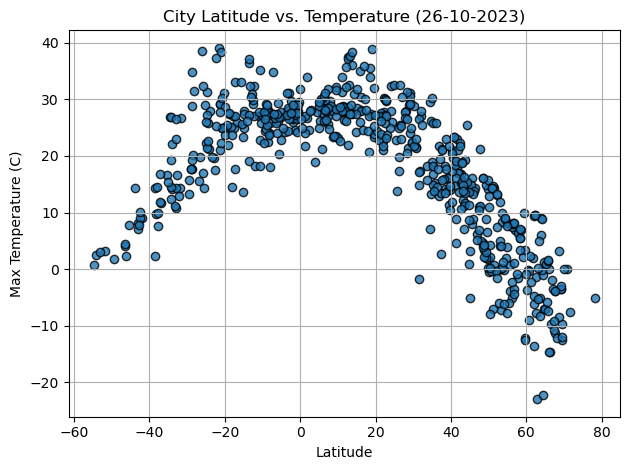

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")

# get date
date = pd.to_datetime('today').normalize()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

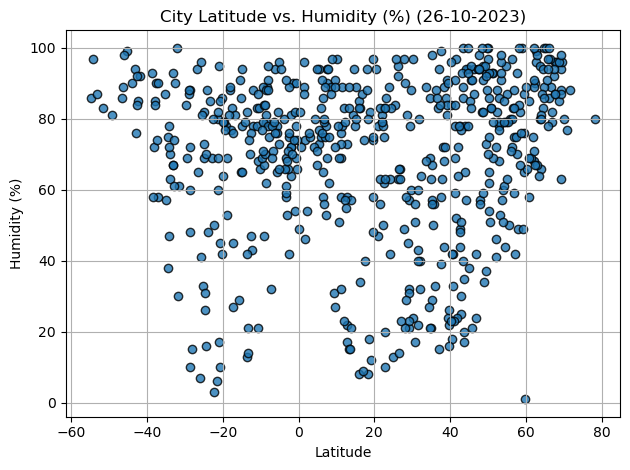

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

# get date
date = pd.to_datetime('today').normalize()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

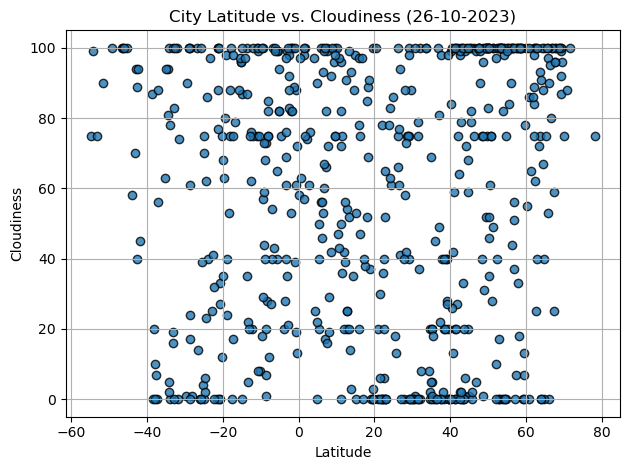

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

# get date
date = pd.to_datetime('today').normalize()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

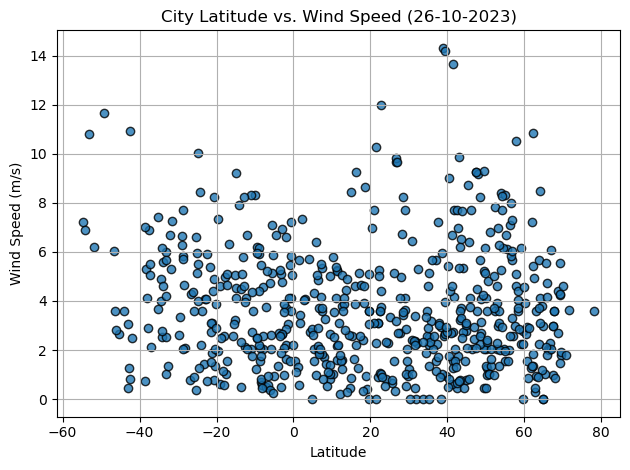

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

# get date
date = pd.to_datetime('today').normalize()
date = date.strftime("%d-%m-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,chibougamau,49.9168,-74.3659,1.79,100,100,2.06,CA,1698317415
4,weno,7.4515,151.8468,26.97,94,100,3.60,FM,1698317415
5,bethel,41.3712,-73.4140,14.95,78,0,1.54,US,1698317372
10,tofol,5.3248,163.0078,29.33,73,50,4.34,FM,1698317418
11,baker city,44.7749,-117.8344,0.88,94,59,2.76,US,1698317419


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novo aripuana,-5.1206,-60.3797,26.92,73,82,0.94,BR,1698317413
1,hermanus,-34.4187,19.2345,19.29,75,81,4.90,ZA,1698317355
2,bredasdorp,-34.5322,20.0403,26.89,38,94,3.99,ZA,1698317414
6,yerba buena,-26.8167,-65.3167,15.63,94,100,0.80,AR,1698317416
7,mahina,-17.5065,-149.4890,24.87,83,0,1.03,PF,1698317417


###  Temperature vs. Latitude Linear Regression Plot

The r-value: -0.8725875620798433
 
The regression displays a negative correlation between temperature and latitude
As Latitude increases, the max temp decreases.


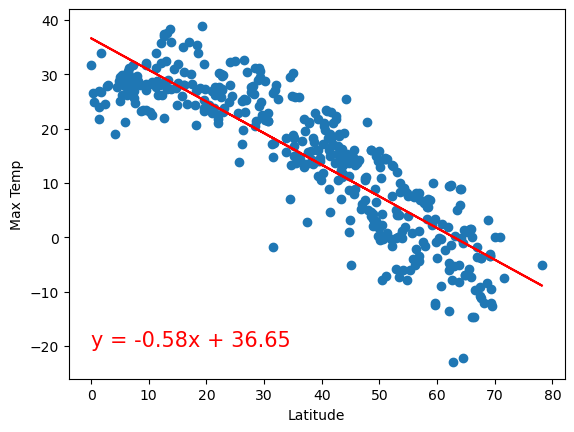

In [20]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f'The r-value: {rvalue}')
print(" ")
print("The regression displays a negative correlation between temperature and latitude")
print("As Latitude increases, the max temp decreases.")

The r-value is: 0.4121057168607245


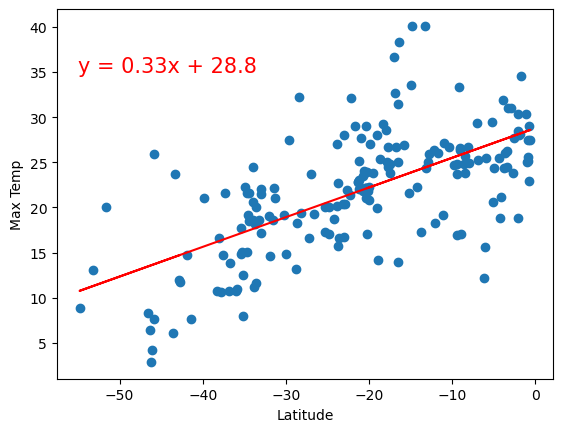

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f'The r-value: {rvalue}')
print(" ")
print("The regression displays a weaker positive correlation between temperature and latitude")
print("As Latitude increases, max temp increases")
print("Slope is less steaper than the Northern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2067735265490258
 
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude.


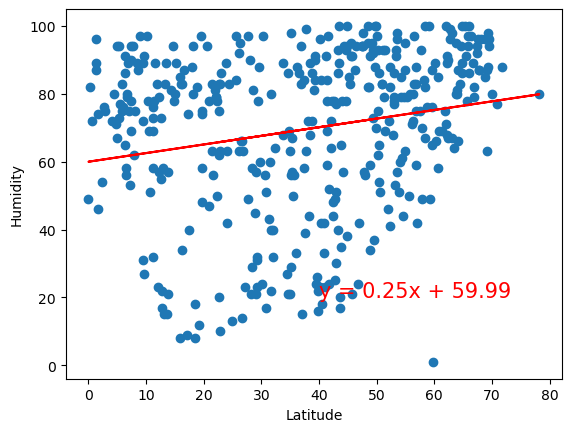

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-value: {rvalue}')
print(" ")
print("There is slight positive correlation between humidity and latitude in the northern hemisphere.")

The r-value is -0.07860361868216538
 
There is weak negative correlation between humidity and latitude in the southern hemisphere


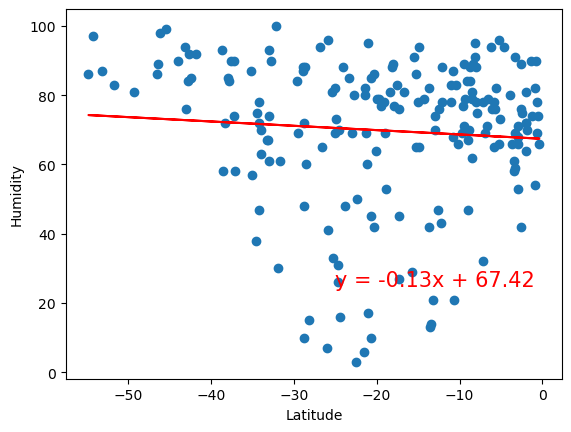

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-value: {rvalue}')
print(" ")

print("There is weak negative correlation between humidity and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value: 0.16515933564435548
 
There is positive correlation between humidity and latitude in the northern hemisphere


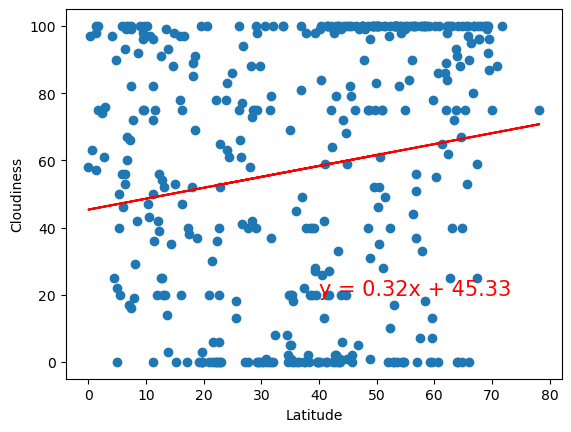

In [27]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-value: {rvalue}')
print(" ")
print("There is positive correlation between humidity and latitude in the northern hemisphere")

The r-value: 0.05896217617778038
 
There is positive correlation between humidity and latitude in the southern hemisphere


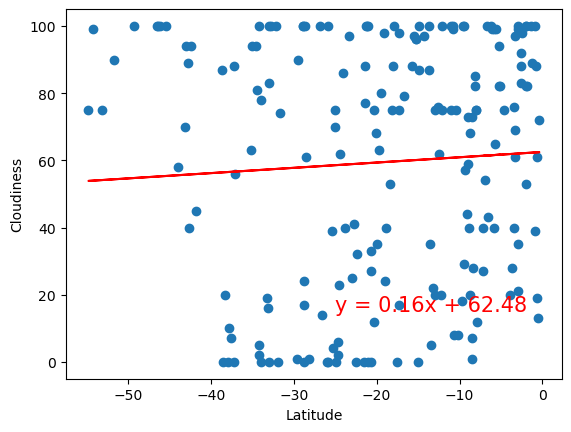

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-value: {rvalue}')
print(" ")
print("There is a weak positive correlation between humidity and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value: 0.07525466101019802
 
There is a very weak positive correlation between wind speed and latitude in the northern hemisphere


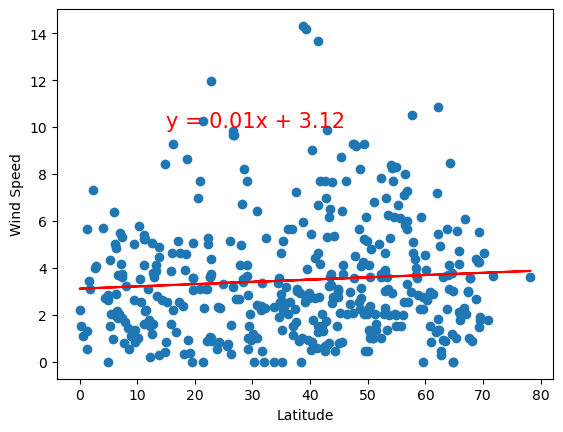

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f'The r-value: {rvalue}')
print(" ")
print("There is a very weak positive correlation between wind speed and latitude in the northern hemisphere")

The r-value: -0.21854151222797716
 
There is a very weak positive correlation between wind speed and latitude in the southern hemisphere


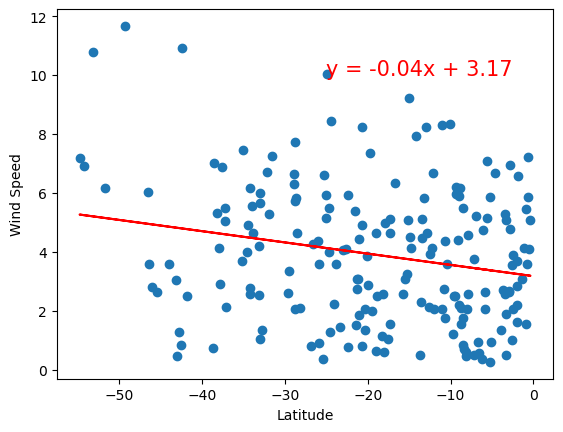

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f'The r-value: {rvalue}')
print(" ")
print("There is a negative correlation between wind speed and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE